In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
traindf=pd.read_csv("drive/My Drive/Colab Notebooks/Final Project/Task 1/train.csv")
traindf.head()

,Pic Name,number of horizontal rebars,number of vertical rebars,Total rebars
0,20191024_100109_Depth_64669.png,8,9,17
1,20191024_100109_Depth_64594.png,8,9,17
2,20191024_100109_Depth_64690.png,8,9,17
3,20191024_095044_Depth_47399.png,7,7,14
4,20191024_095044_Depth_47300.png,7,7,14


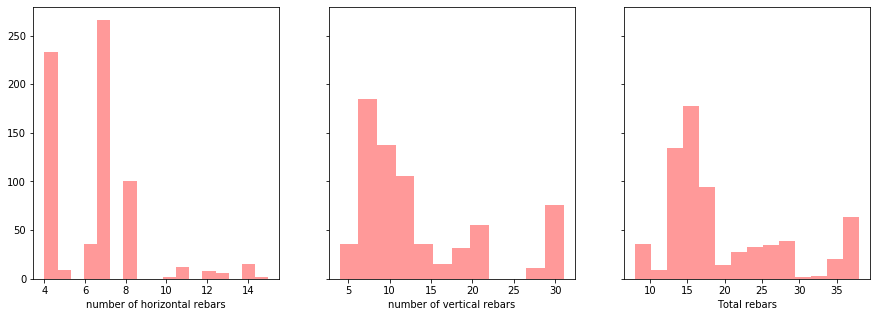

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, sharey=True, figsize=[15, 5])
sns.distplot(traindf['number of horizontal rebars'], kde=False, color='r', ax=ax[0])
sns.distplot(traindf['number of vertical rebars'], kde=False, color='r', ax=ax[1])
sns.distplot(traindf['Total rebars'], kde=False, color='r', ax=ax[2])

In [0]:
testdf=pd.read_csv("drive/My Drive/Colab Notebooks/Final Project/Task 1/testName.csv")
testdf.head()

,Pic Name
0,test_Depth_9280.png
1,20191024_10852_Depth_112034.png
2,test_Depth_14496.png
3,20190531_105600_Depth_5472.png
4,20190531_100725_Depth_20817.png


In [0]:
import os
from keras.preprocessing.image import ImageDataGenerator

# base_dir = '.\\train_img'
# train_dir = os.path.join(base_dir, 'train_img')
train_dir = 'drive/My Drive/Colab Notebooks/Final Project/Task 1/totalDepthPic'
test_dir = 'drive/My Drive/Colab Notebooks/Final Project/Task 1/totalDepthPic'
BATCH_SIZE = 20

datagen = ImageDataGenerator(
    # width_shift_range=10,
    # height_shift_range=10,
    # rotation_range=15,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    rescale=1./255., 
    validation_split=0.25
)
train_generator=datagen.flow_from_dataframe( 
    dataframe=traindf, 
    directory=train_dir, 
    x_col='Pic Name', 
    y_col='Total rebars', 
    has_ext=False, 
    subset="training", 
    class_mode="raw", 
    batch_size=BATCH_SIZE,
    target_size=(150, 150)
)

validation_generator=datagen.flow_from_dataframe( 
    dataframe=traindf, 
    directory=train_dir,
    x_col='Pic Name', 
    y_col='Total rebars', 
    has_ext=False, 
    subset="validation", 
    class_mode="raw",
    batch_size=BATCH_SIZE,
    target_size=(150, 150)
    )

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory=test_dir,
    x_col='Pic Name',
    target_size=(150, 150),
    color_mode='rgb',
    shuffle=False,
    class_mode=None
)

Using TensorFlow backend.


Found 517 validated image filenames.
Found 172 validated image filenames.
Found 101 validated image filenames.


In [0]:
from keras.applications.xception import Xception

base = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)













83689472/83683744 [==============================] - 7s 0us/step


In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation=None))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5),
    loss='mse',
    metrics=['mse']
)

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)



Epoch 1/50
50/50 [==============================] - 288s 6s/step - loss: 128.4765 - mean_squared_error: 128.4765 - val_loss: 29.6554 - val_mean_squared_error: 29.6554
Epoch 2/50
50/50 [==============================] - 52s 1s/step - loss: 48.4888 - mean_squared_error: 48.4888 - val_loss: 45.1013 - val_mean_squared_error: 45.1013
Epoch 3/50
50/50 [==============================] - 51s 1s/step - loss: 41.1063 - mean_squared_error: 41.1063 - val_loss: 27.5010 - val_mean_squared_error: 27.5010
Epoch 4/50
50/50 [==============================] - 51s 1s/step - loss: 35.3583 - mean_squared_error: 35.3583 - val_loss: 15.2029 - val_mean_squared_error: 15.2029
Epoch 5/50
50/50 [==============================] - 50s 1s/step - loss: 30.5469 - mean_squared_error: 30.5469 - val_loss: 9.3553 - val_mean_squared_error: 9.3553
Epoch 6/50
50/50 [==============================] - 51s 1s/step - loss: 27.4392 - mean_squared_error: 27.4392 - val_loss: 6.8393 - val_mean_squared_error: 6.8393
Epoch 7/50
50/5

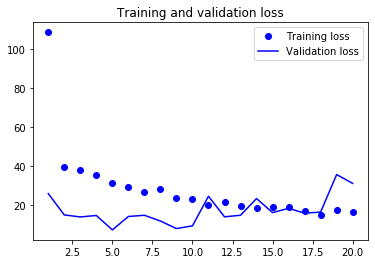

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
pred = new_model.predict_generator(test_generator)
pred

In [0]:
pred_int = pred.astype('int')
testdf['Total rebars'] = pred_int
testdf.head

In [0]:
testdf.to_csv("drive/My Drive/Colab Notebooks/Final Project/Task 1/result7.csv", index=False, encoding='utf-8')